# MNIST using FastAI

## Pre Course

*   Trying different models instead of resent variants.
*   use the timm library by pip installing it.

## Structure of the model.pkl file

When we perform `learn.predict(image)`, we get a tensor that is a list of all possible probabilities of the predicted classes. 

In order to see what each of those probabilities are, we can run `learn.dls.vocab`, which is an object of `DataLoader` type. 
    
    * get code to print the list of vocabs and prob

model.pkl file is a leaner obj type. Has 2 things in it.

    1. Data Pre-Processing(the dataloader)
    2. The trained model(layered architecture.)

to check model parameter usning `model.getsubmodule('0.model.stages.....')` using the dot operator to navigate through the tree.



# How to fit function to data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_function(func, equation):
    x = np.linspace(-10, 10, 100)  # Adjust the range of x-values as needed
    y = func(x)

    plt.plot(x, y)
    plt.title("Graph of {}".format(equation))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()


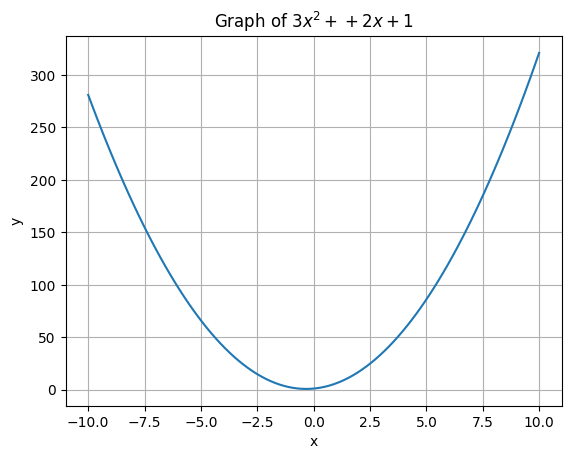

In [2]:
def f(x): return 3*x**2 + 2*x + 1

plot_function(f, '$3x^2 + + 2x + 1$')

Now, we don't know the function. Lets try estimating it by some other techniques

In [3]:
def quad(a,b,c,x): return a*x**2 +b*x +c

quad(3,2,1,1.5)

10.75

In [4]:
from functools import partial

def mk_quad(a,b,c): return partial(quad,a,b,c)

f= mk_quad(3,2,1)

f(1.5)

10.75

Lets Add Noise to our data to create a synthetic set of data points for estimation.

In [5]:
from numpy.random import normal, seed, uniform
np.random.seed(42)

def noise(x, scale): return normal(scale = scale, size = x.shape)
def add_noise(x, mult, add): return x * (1+noise(x, mult)) + noise(x, add)


In [7]:
import torch

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from ipywidgets import interact

def f(x):
    return 3*x**2 + 2*x + 1

def add_noise(y, mean, std):
    noise = torch.randn_like(y) * std + mean
    return y + noise

def plot_function(mean, std):
    x = torch.linspace(-2, 2, steps=20)[:, None]
    y = add_noise(f(x), mean, std)

    plt.scatter(x, y)
    plt.title("Scatter Plot with Noise")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

interact(plot_function, mean=(-1.0, 1.0, 0.1), std=(0.1, 2.0, 0.1))


interactive(children=(FloatSlider(value=0.0, description='mean', max=1.0, min=-1.0), FloatSlider(value=1.0, de…

<function __main__.plot_function(mean, std)>

Now, we have added synthetic data to our existing datapoints.

Lets try estimating the function using manual tools

and doing so, we get some close curve.

But its not possible in larger dimensinonal spaces.

So, introduce a loss function.

## Loss Function

The below code is a mean square error.

In [33]:
def mse(preds, acts): return ((preds-acts)**2).mean()

Now, we have a parameter to tell us if the way we fit our function improves our prediction or not. lesser the mse, the better the prediction is.

Now, to automate this process, we will use gradient ascend or descend, with help from pytorch that can do it.

Tensor is the base for pytorch. Vectors or numbers, are essentially 1D tensors. Rectangles or tables of numbers, is a 2D Tensor. Layers of Tables of numebers is an nD Tensor. 

We automate this gradient descent to minimize the loss(MSE). 

## Rectified Linear Unit:

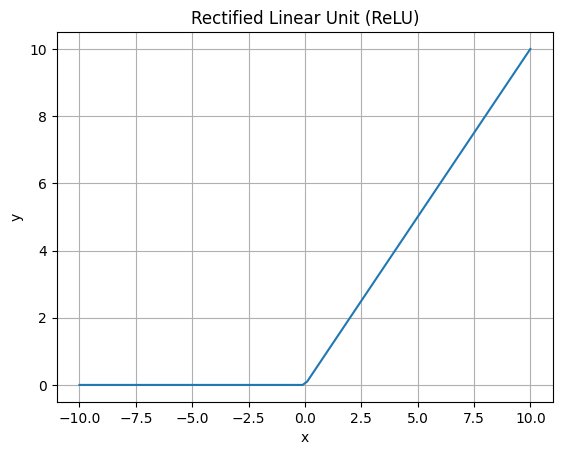

In [19]:
# import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

def plot_relu():
    x = np.linspace(-10, 10, 100)
    y = relu(x)

    plt.plot(x, y)
    plt.title("Rectified Linear Unit (ReLU)")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

plot_relu()

## Double ReLU

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

def relu(x):
    return np.maximum(0, x)

def double_relu(a, b):
    def double_relu_func(x):
        return relu(a*relu(x) + b)
    return double_relu_func

def plot_double_relu(a, b):
    x = np.linspace(-10, 10, 100)
    y = double_relu(a, b)(x)

    plt.plot(x, y)
    plt.title("Double Rectified Linear Unit (ReLU)")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.ylim(-3, 12)  # Adjust the y-axis limits as needed
    plt.show()

interact(plot_double_relu, a=(-3, 3, 0.1), b=(-3, 3, 0.1))


interactive(children=(FloatSlider(value=0.0, description='a', max=3.0, min=-3.0), FloatSlider(value=0.0, descr…

<function __main__.plot_double_relu(a, b)>

Now, using this ReLU, we can predict a model.

